In [ ]:
from utils.util import *
from matplotlib import pyplot as plt
import torch.optim as optim
# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = Loader(data_dir="data").load_csv(file_name="diabetes_dataset_with_notes.csv")

In [3]:
data = data.drop(columns="clinical_notes")
data = data.dropna()
data = data.drop_duplicates()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical columns
categorical_columns = ['gender', 'location', 'smoking_history']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

    # Reindex rows
    data = data.reset_index(drop=True)

data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,0,0,0,0,0,1,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,0,0,1,0,0,0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,0,0,0,0,0,1,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,0,0,0,1,0,0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,0,1,0,0,0,0,0,0,4,23.75,6.5,90,0


In [5]:
datadrop = data.drop(columns=["gender"])

In [6]:
datainv = data.copy()
datainv['gender'] = datainv['gender'].apply(lambda x: 1 - x)

In [ ]:
DatasetD = DataSet(data=datadrop)
train_dataD, test_dataD = DatasetD.get_datasets()

In [11]:
DatasetL = DataSet(data=data)
train_data, test_data = DatasetL.get_datasets()

In [12]:
DatasetInvL = DataSet(data=datainv)
train_dataInv, test_dataInv = DatasetInvL.get_datasets()

In [ ]:
model = NeuralNetwork(d = 64, input = 15, output = 2).to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.eval()

NeuralNetwork(
  (layer1): Linear(in_features=15, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
  (relu): ReLU()
  (normalization): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [38]:
model.load_state_dict(torch.load("model/model1.pth"))

<All keys matched successfully>

In [18]:
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    # for batch_idx, (inputs, targets) in enumerate(train_loader):
    #    inputs, targets = inputs.to(0), targets.to(0)
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(train_data.X)
    loss = criterion(outputs, train_data.y.float())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        model.eval()
        with torch.no_grad():
            # Forward pass
            test_outputs = model(test_data.X)
    
            # Calculate the loss
            test_loss = criterion(test_outputs, test_data.y.float())
    
            # Calculate accuracy
            predicted = torch.argmax(test_outputs, 1)
            labels = torch.argmax(test_data.y, 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)
            accuracy_f = (predicted == labels)[DatasetL.X_test['gender'].values == 0].sum().item() / labels[DatasetL.X_test['gender'].values == 0].size(0)
            accuracy_m = (predicted == labels)[DatasetL.X_test['gender'].values == 1].sum().item() / labels[DatasetL.X_test['gender'].values == 1].size(0)

            print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
            # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    
            print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Epoch [2/2000], Loss: 0.5205
Test Loss: 0.5598, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5598, Test Accuracy: 91.35%
Epoch [4/2000], Loss: 0.5072
Test Loss: 0.5535, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5535, Test Accuracy: 91.35%
Epoch [6/2000], Loss: 0.4945
Test Loss: 0.5472, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5472, Test Accuracy: 91.35%
Epoch [8/2000], Loss: 0.4824
Test Loss: 0.5411, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5411, Test Accuracy: 91.35%
Epoch [10/2000], Loss: 0.4707
Test Loss: 0.5215, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5215, Test Accuracy: 91.35%
Epoch [12/2000], Loss: 0.4598
Test Loss: 0.4588, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.4588, Test Accuracy: 91.35%
Epoch [14/2000], Loss: 0.4493
Test Loss: 0.4889, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.4889, Test Accuracy: 91.35%
Epoch [16/2000], Loss: 0.4391
Test Loss: 0.5118, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.5118, Test Accuracy: 91.35%
Epoch [18/2000], Loss: 0.4290
Test Loss: 0.5

In [ ]:
# torch.save(model.state_dict(), 'model/model1.pth')

In [39]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_data.X)

    # Calculate the loss
    test_loss = criterion(test_outputs, test_data.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_data.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetL.X_test['gender'].values == 0].sum().item() / labels[DatasetL.X_test['gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetL.X_test['gender'].values == 1].sum().item() / labels[DatasetL.X_test['gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.1215, Test Accuracy: 94.91%, 96.08%
Test Loss: 0.1215, Test Accuracy: 95.59%


In [40]:
men_0 = predicted[DatasetL.X_test['gender'].values == 0]
women_0 = predicted[DatasetL.X_test['gender'].values == 1]

In [41]:
len(men_0[men_0 == 0])/len(men_0[men_0 == 1])

12.863095238095237

In [42]:
len(women_0[women_0 == 0])/len(women_0[women_0 == 1])

9.541666666666666

In [43]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_dataInv.X)

    # Calculate the loss
    test_loss = criterion(test_outputs, test_dataInv.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_dataInv.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetInvL.X_test['gender'].values == 0].sum().item() / labels[DatasetInvL.X_test['gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetInvL.X_test['gender'].values == 1].sum().item() / labels[DatasetInvL.X_test['gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.1242, Test Accuracy: 95.63%, 95.13%
Test Loss: 0.1242, Test Accuracy: 95.42%


In [44]:
men_1 = predicted[DatasetInvL.X_test['gender'].values == 0]
women_1 = predicted[DatasetInvL.X_test['gender'].values == 1]

In [45]:
len(men_1[men_1 == 0])/len(men_1[men_1 == 1])

10.726123595505618

In [46]:
len(women_1[women_1 == 0])/len(women_1[women_1 == 1])

11.467880085653105

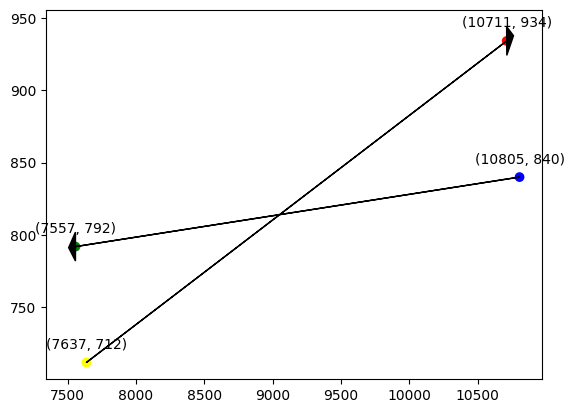

In [ ]:
x = [len(men_0[men_0 == 0]), len(women_0[women_0 == 0]), len(men_1[men_1 == 0]), len(women_1[women_1 == 0])]
y = [len(men_0[men_0 == 1]), len(women_0[women_0 == 1]), len(men_1[men_1 == 1]), len(women_1[women_1 == 1])]
plt.figure(0)
plt.scatter(x, y,c=['blue', 'green', 'yellow', 'red'])
# plt.plot(x[:2], y[:2], 'k-', lw=2)
plt.arrow(x[0], y[0], x[1] - x[0], y[1] - y[0], head_width=20, head_length=50, fc='k', ec='k')
plt.arrow(x[2], y[2], x[3] - x[2], y[3] - y[2], head_width=20, head_length=50, fc='k', ec='k')
for i in range(len(x)):
    plt.annotate(f'({x[i]}, {y[i]})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.savefig("outputs/output_with_gender_unfairness1.png")
# plt.plot(x[2:], y[2:], 'k-', lw=2)

In [ ]:
###Drop gender columns

In [ ]:
model = NeuralNetwork(d = 64, input = 14, output = 2).to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.eval()

NeuralNetwork(
  (layer1): Linear(in_features=14, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
  (relu): ReLU()
  (normalization): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [20]:
model.load_state_dict(torch.load("model/model1D.pth"))

<All keys matched successfully>

In [23]:
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    # for batch_idx, (inputs, targets) in enumerate(train_loader):
    #    inputs, targets = inputs.to(0), targets.to(0)
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(train_data.X[:, [i for i in range(train_data.X.shape[1]) if i != 1]])
    loss = criterion(outputs, train_data.y.float())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        model.eval()
        with torch.no_grad():
            # Forward pass
            test_outputs = model(test_data.X[:, [i for i in range(test_data.X.shape[1]) if i != 1]])
    
            # Calculate the loss
            test_loss = criterion(test_outputs, test_data.y.float())
    
            # Calculate accuracy
            predicted = torch.argmax(test_outputs, 1)
            labels = torch.argmax(test_data.y, 1)
            accuracy = (predicted == labels).sum().item() / labels.size(0)
            accuracy_f = (predicted == labels)[DatasetL.X_test['gender'].values == 0].sum().item() / labels[DatasetL.X_test['gender'].values == 0].size(0)
            accuracy_m = (predicted == labels)[DatasetL.X_test['gender'].values == 1].sum().item() / labels[DatasetL.X_test['gender'].values == 1].size(0)

            print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
            # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    
            print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Epoch [2/2000], Loss: 0.7631
Test Loss: 0.7507, Test Accuracy: 9.88%, 7.77%
Test Loss: 0.7507, Test Accuracy: 8.65%
Epoch [4/2000], Loss: 0.7461
Test Loss: 0.7335, Test Accuracy: 9.88%, 7.77%
Test Loss: 0.7335, Test Accuracy: 8.65%
Epoch [6/2000], Loss: 0.7314
Test Loss: 0.7194, Test Accuracy: 9.88%, 7.77%
Test Loss: 0.7194, Test Accuracy: 8.65%
Epoch [8/2000], Loss: 0.7160
Test Loss: 0.7048, Test Accuracy: 9.88%, 7.77%
Test Loss: 0.7048, Test Accuracy: 8.65%
Epoch [10/2000], Loss: 0.7003
Test Loss: 0.6911, Test Accuracy: 92.03%, 93.86%
Test Loss: 0.6911, Test Accuracy: 93.10%
Epoch [12/2000], Loss: 0.6845
Test Loss: 0.7077, Test Accuracy: 79.81%, 79.27%
Test Loss: 0.7077, Test Accuracy: 79.50%
Epoch [14/2000], Loss: 0.6685
Test Loss: 0.7155, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.7155, Test Accuracy: 91.35%
Epoch [16/2000], Loss: 0.6525
Test Loss: 0.7075, Test Accuracy: 90.12%, 92.23%
Test Loss: 0.7075, Test Accuracy: 91.35%
Epoch [18/2000], Loss: 0.6365
Test Loss: 0.6997, Test Ac

In [ ]:
# torch.save(model.state_dict(), 'model/model1D.pth')

In [26]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_data.X[:, [i for i in range(test_data.X.shape[1]) if i != 1]])

    # Calculate the loss
    test_loss = criterion(test_outputs, test_data.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_data.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetL.X_test['gender'].values == 0].sum().item() / labels[DatasetL.X_test['gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetL.X_test['gender'].values == 1].sum().item() / labels[DatasetL.X_test['gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.1212, Test Accuracy: 95.11%, 96.37%
Test Loss: 0.1212, Test Accuracy: 95.84%


In [27]:
men_0 = predicted[DatasetL.X_test['gender'].values == 0]
women_0 = predicted[DatasetL.X_test['gender'].values == 1]

In [28]:
len(men_0[men_0 == 0])/len(men_0[men_0 == 1])

18.09016393442623

In [29]:
len(women_0[women_0 == 0])/len(women_0[women_0 == 1])

14.782608695652174

In [30]:
# Evaluation loop
model.eval()
with torch.no_grad():
    # Forward pass
    test_outputs = model(test_dataInv.X[:, [i for i in range(test_data.X.shape[1]) if i != 1]])

    # Calculate the loss
    test_loss = criterion(test_outputs, test_dataInv.y.float())
    
    # Calculate accuracy
    predicted = torch.argmax(test_outputs, 1)
    labels = torch.argmax(test_dataInv.y, 1)
    accuracy = (predicted == labels).sum().item() / labels.size(0)
    accuracy_f = (predicted == labels)[DatasetInvL.X_test['gender'].values == 0].sum().item() / labels[DatasetInvL.X_test['gender'].values == 0].size(0)
    accuracy_m = (predicted == labels)[DatasetInvL.X_test['gender'].values == 1].sum().item() / labels[DatasetInvL.X_test['gender'].values == 1].size(0)
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy_m * 100:.2f}%, {accuracy_f * 100:.2f}%')
    # print(f'Test Loss_f: {test_loss.item():.4f}, Test Accuracy_f: {accuracy_f * 100:.2f}%, {accuracy_f * 100:.2f}%')
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.1212, Test Accuracy: 96.37%, 95.11%
Test Loss: 0.1212, Test Accuracy: 95.84%


In [31]:
men_1 = predicted[DatasetInvL.X_test['gender'].values == 0]
women_1 = predicted[DatasetInvL.X_test['gender'].values == 1]

In [32]:
len(men_1[men_1 == 0])/len(men_1[men_1 == 1])

14.782608695652174

In [33]:
len(women_1[women_1 == 0])/len(women_1[women_1 == 1])

18.09016393442623

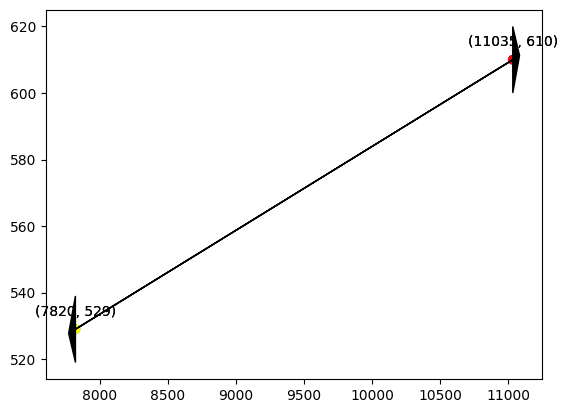

In [ ]:
x = [len(men_0[men_0 == 0]), len(women_0[women_0 == 0]), len(men_1[men_1 == 0]), len(women_1[women_1 == 0])]
y = [len(men_0[men_0 == 1]), len(women_0[women_0 == 1]), len(men_1[men_1 == 1]), len(women_1[women_1 == 1])]
plt.figure(0)
plt.scatter(x, y,c=['blue', 'green', 'yellow', 'red'])
# plt.plot(x[:2], y[:2], 'k-', lw=2)
plt.arrow(x[0], y[0], x[1] - x[0], y[1] - y[0], head_width=20, head_length=50, fc='k', ec='k')
plt.arrow(x[2], y[2], x[3] - x[2], y[3] - y[2], head_width=20, head_length=50, fc='k', ec='k')
for i in range(len(x)):
    plt.annotate(f'({x[i]}, {y[i]})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.savefig("outputs/output_drop_gender_fairness1.png")
# plt.plot(x[2:], y[2:], 'k-', lw=2)